In [1]:
import pandas as pd
from statistics import mean, stdev 

# Load and Prepare data

In [2]:
merchant_train = pd.read_csv('../data/curated/final_model/agg_fortnightly_mean_sd_marketcorr_train_NOFRAUD.csv')
merchant_validate = pd.read_csv('../data/curated/final_model/agg_fortnightly_mean_sd_marketcorr_validate_NOFRAUD.csv')
merchant_overall = pd.read_csv('../data/curated/final_model/agg_fortnightly_mean_sd_marketcorr_NOFRAUD.csv')

merchant_fortnight_train = pd.read_csv('../data/curated/final_model/fortnightly_agg_merchant_transactions_train_NOFRAUD.csv')
merchant_fortnight_validate = pd.read_csv('../data/curated/final_model/fortnightly_agg_merchant_transactions_validate_NOFRAUD.csv')
merchant_fortnight= pd.read_csv('../data/curated/final_model/fortnightly_agg_merchant_transactions_NOFRAUD.csv')

In [3]:
loyalty_train = pd.read_csv('../data/curated/final_model/loyalty_train.csv')
loyalty_train = loyalty_train[['merchant_abn', 'repeated_purchase_rate']]

loyalty_overall = pd.read_csv(('../data/curated/final_model/loyalty_full.csv'))
loyalty_overall = loyalty_train[['merchant_abn', 'repeated_purchase_rate']]

In [4]:
persona_train = pd.read_csv('../data/curated/final_model/persona_train.csv')

persona_overall = pd.read_csv(('../data/curated/final_model/persona_full.csv'))

In [5]:
growth_train = pd.read_csv('../data/curated/final_model/E(r)_train.csv')

growth_overall = pd.read_csv('../data/curated/final_model/E(r)_final.csv')

In [6]:
# merge dataset with 4th to 6th variable
merchant_train = merchant_train.merge(growth_train, on='merchant_abn', how='inner')
merchant_train = merchant_train.merge(loyalty_train, on='merchant_abn', how='inner')
merchant_train = merchant_train.merge(persona_train, on='merchant_abn', how='inner')

merchant_train

,merchant_abn,mean,stdev,n_periods,corr,covar,beta,weighted E(r),repeated_purchase_rate,persona_score
0,10023283211,70749.673866,18636.265281,23,0.924841,2.089959e+11,0.001421,-0.323900,0.036760,0.003602
1,10142254217,22397.234199,7661.654456,23,0.848513,7.883019e+10,0.000536,-0.380866,0.041188,0.004071
2,10187291046,6739.845784,3296.685077,23,0.356489,1.425068e+10,0.000097,-0.589436,0.000000,0.003787
3,10192359162,41976.201423,19772.703184,23,0.503911,1.208179e+11,0.000822,-0.551896,0.000000,0.005775
4,10206519221,90606.920640,25122.144347,23,0.945070,2.878939e+11,0.001958,-0.383000,0.107863,0.003607
...,...,...,...,...,...,...,...,...,...,...
4339,99938978285,106653.055688,25983.036269,23,0.978122,3.081731e+11,0.002096,-0.395115,0.175840,0.003789
4340,99974311662,6155.721098,3952.631998,23,0.301563,1.445361e+10,0.000098,-0.351165,0.000000,0.003838
4341,99976658299,877875.375777,223217.077839,23,0.983820,2.662900e+12,0.018111,-0.391975,0.231100,0.003747
4342,99987905597,13342.109019,7503.391891,23,0.349577,3.180625e+10,0.000216,-0.378324,0.000000,0.001920


In [7]:
# sometimes std/covar has nan values, fill them with 0
merchant_overall = merchant_overall.fillna(0)
merchant_train = merchant_train.fillna(0)
merchant_validate = merchant_validate.fillna(0)

# standardise
merchant_train['mean'] = (merchant_train['mean']-mean(merchant_train['mean']))/stdev(merchant_train['mean'])
merchant_train['stdev'] = (merchant_train['stdev']-mean(merchant_train['stdev']))/stdev(merchant_train['stdev'])
merchant_train['corr'] = (merchant_train['corr']-mean(merchant_train['corr']))/stdev(merchant_train['corr'])
merchant_train['weighted E(r)'] = (merchant_train['weighted E(r)']-mean(merchant_train['weighted E(r)']))/stdev(merchant_train['weighted E(r)'])
merchant_train['repeated_purchase_rate'] = (merchant_train['repeated_purchase_rate']-mean(merchant_train['repeated_purchase_rate']))/stdev(merchant_train['repeated_purchase_rate'])
merchant_train['persona_score'] = (merchant_train['persona_score']-mean(merchant_train['persona_score']))/stdev(merchant_train['persona_score'])

In [8]:
# merge dataset with 4th variable
merchant_overall = merchant_overall.merge(growth_overall, on='merchant_abn', how='inner')
merchant_overall = merchant_overall.merge(loyalty_overall, on='merchant_abn', how='inner')
merchant_overall = merchant_overall.merge(persona_overall, on='merchant_abn', how='inner')

merchant_overall

,merchant_abn,mean,stdev,n_periods,corr,covar,beta,weighted E(r),repeated_purchase_rate,persona_score
0,10023283211,71944.954088,15268.757666,38,0.898658,1.663833e+11,0.001132,-0.506826,0.036760,0.004553
1,10142254217,22687.034837,6496.702667,38,0.801093,6.310849e+10,0.000429,-0.523320,0.041188,0.004740
2,10187291046,6831.716274,3379.999688,38,0.349956,1.434304e+10,0.000098,-0.374233,0.000000,0.004666
3,10192359162,40955.314495,17639.407542,38,0.472340,1.010300e+11,0.000687,-0.539180,0.000000,0.006020
4,10206519221,88038.400673,21292.527062,38,0.921726,2.379801e+11,0.001619,-0.506193,0.107863,0.004468
...,...,...,...,...,...,...,...,...,...,...
4343,99938978285,106551.591313,21699.148448,38,0.959032,2.523407e+11,0.001716,-0.539419,0.175840,0.004735
4344,99974311662,6326.735554,4783.350900,38,0.169271,9.818105e+09,0.000067,-0.393847,0.000000,0.006811
4345,99976658299,871306.137224,186985.910229,38,0.978855,2.219417e+12,0.015094,-0.531831,0.231100,0.004723
4346,99987905597,16290.096561,10052.773545,38,0.258865,3.155515e+10,0.000215,-0.357825,0.000000,0.003205


# Define functions

First write function that gets scores of all stores

In [9]:
a_combo = [1, 1, 1, 1, 1, 1]

In [10]:
def get_hscore(merchant_train, a_combo, k):
    # helper function to get the score for a company using h value input
    VARNAME = ['mean', 'stdev', 'corr', 'weighted E(r)', 'repeated_purchase_rate', 'persona_score']

    merchant_train['score'] = a_combo[0] * merchant_train[VARNAME[0]]

    for i in range(1, k):
        merchant_train['score'] = merchant_train['score'] + a_combo[i] * merchant_train[VARNAME[i]]
    
    return merchant_train[['merchant_abn', 'score']]

In [11]:
# testrun of helper function
merchants_train_score = get_hscore(merchant_train, a_combo, 6)
merchants_train_score

,merchant_abn,score
0,10023283211,0.621692
1,10142254217,0.144346
2,10187291046,-1.891649
3,10192359162,-0.754650
4,10206519221,1.707912
...,...,...
4339,99938978285,2.731955
4340,99974311662,-1.882147
4341,99976658299,9.956140
4342,99987905597,-2.000032


Get top 100 and make into portfolio (just a list)

In [12]:
def get_portfolio_abn(merchants_train_score):
    # get the top 100 merchant's abn
    
    sorted_merchants_train_score = merchants_train_score.sort_values(['score'], ascending=False)

    top_100_portfolio = sorted_merchants_train_score.head(100)

    top_portfolio_merchants = list(top_100_portfolio['merchant_abn'])

    return top_portfolio_merchants

In [13]:
# testrun the function
top_portfolio_merchants = get_portfolio_abn(merchants_train_score)
# top_portfolio_merchants

Get Portfolio Stats (load periodic data and add up)

- get portfolio fortnightly E[r] and sd(r) after summing up portfolio transactions for each fortnight and take mean(), std()
- calculate E(r) / sd(r)

In [14]:
def get_sharpe_ratio_of_portfolio(merchant_fortnight_validate, top_portfolio_merchants):
    # calculate the sharpe ratio using the validate

    top_100_portfolio_fortnightly = pd.DataFrame()

    for abn in top_portfolio_merchants:
        tmp = merchant_fortnight_validate[merchant_fortnight_validate['merchant_abn'] == abn]
        top_100_portfolio_fortnightly = pd.concat([top_100_portfolio_fortnightly, tmp])

    top_100_portfolio_fortnightly_agg = top_100_portfolio_fortnightly.groupby(['Year', 'Fortnight']).agg({'sum_transactions': mean})

    top_100_portfolio_fortnightly_mean = mean(top_100_portfolio_fortnightly_agg['sum_transactions'])
    top_100_portfolio_fortnightly_sd = stdev(top_100_portfolio_fortnightly_agg['sum_transactions'])

    portfolio_sharpe_ratio = top_100_portfolio_fortnightly_mean/top_100_portfolio_fortnightly_sd
    
    return portfolio_sharpe_ratio

In [15]:
# testrun the function
portfolio_sharpe_ratio = get_sharpe_ratio_of_portfolio(merchant_fortnight_validate, top_portfolio_merchants)
portfolio_sharpe_ratio

9.64312289518491

# Run Test

In [16]:
a_combos = []

a_values = [1, 100, 10000, 0.01, 0.0001, -1, -100, -10000, -0.01, -0.0001]


for a1 in a_values:
    # a_combos.append([a1])
    for a2 in a_values:
        # a_combos.append([a1, a2])
        for a3 in a_values:
            # a_combos.append([a1, a2, a3])
            for a4 in a_values:
                # a_combos.append([a1, a2, a3, a4])
                for a5 in a_values:
                    # a_combos.append([a1, a2, a3, a4, a5])
                    for a6 in a_values:
                        a_combos.append([a1, a2, a3, a4, a5, a6])``

len(a_combos)
                    

1000000

In [17]:
all_sharpe_ratios = list()

for a_combo in a_combos:
    merchants_train_score = get_hscore(merchant_train, a_combo, 6)

    top_portfolio_merchants = get_portfolio_abn(merchants_train_score)

    portfolio_sharpe_ratio = get_sharpe_ratio_of_portfolio(merchant_fortnight_validate, top_portfolio_merchants)

    all_sharpe_ratios.append(portfolio_sharpe_ratio)

In [18]:
results = pd.DataFrame({'all_combos': a_combos, 'sharpe_ratio': all_sharpe_ratios}).sort_values(['sharpe_ratio'], ascending = False)

# Analyse Results

In [19]:
results.head(60)

,all_combos,sharpe_ratio
772722,"[-10000, -10000, 10000, -10000, 10000, 10000]",14.466683
772122,"[-10000, -10000, 10000, 100, 10000, 10000]",14.466683
994944,"[-0.0001, -0.0001, 0.0001, -0.0001, 0.0001, 0....",14.466683
772322,"[-10000, -10000, 10000, 0.01, 10000, 10000]",14.466683
772422,"[-10000, -10000, 10000, 0.0001, 10000, 10000]",14.466683
883433,"[-0.01, -0.01, 0.01, 0.0001, 0.01, 0.01]",14.466683
883833,"[-0.01, -0.01, 0.01, -0.01, 0.01, 0.01]",14.466683
883933,"[-0.01, -0.01, 0.01, -0.0001, 0.01, 0.01]",14.466683
772522,"[-10000, -10000, 10000, -1, 10000, 10000]",14.466683
661311,"[-100, -100, 100, 0.01, 100, 100]",14.466683


In [20]:
results.describe()


,sharpe_ratio
count,1000000.000000
mean,6.696119
std,3.158636
min,1.726312
25%,3.051437
50%,8.278828
75%,8.408623
max,14.466683


array([[<AxesSubplot:title={'center':'sharpe_ratio'}>]], dtype=object)

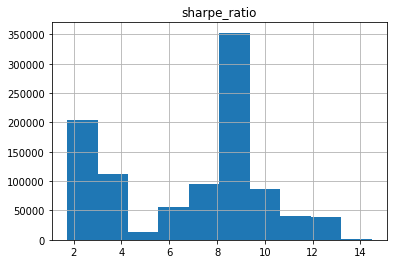

In [21]:
results.hist()

In [22]:
results.to_csv('../data/curated/final_model/1_vars_standardised.csv', index=False)